# Linear Regression

R2 score (Training): 0.7276758870791094
R2 score (Testing): 0.7484748357049904


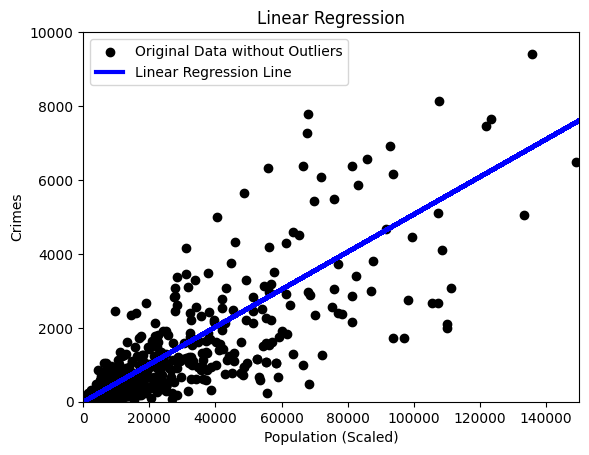

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv("Crime_Rate.csv")

# Drop rows with NaN values
data = data.dropna()

# Identify and remove outliers using z-score
z_scores = (data['Population'] - data['Population'].mean()) / data['Population'].std()
data_no_outliers = data[np.abs(z_scores) < 3]

# Split the data into features (x) and the target variable (y)
x = data_no_outliers['Population'].values.reshape(-1, 1)
y = data_no_outliers['Crimes']

# Feature scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression().fit(x_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(x_train)

# Predictions on the test set
y_test_pred = model.predict(x_test)

# Calculate R-squared for training set
r2_train = r2_score(y_train, y_train_pred)
print('R2 score (Training):', r2_train)

# Calculate R-squared for test set
r2_test = r2_score(y_test, y_test_pred)
print('R2 score (Testing):', r2_test)

# Plot the original data points after removing outliers
plt.scatter(x, y, color='black', label='Original Data without Outliers')

# Plot the regression line
plt.plot(x, model.predict(x_scaled), color='blue', linewidth=3, label='Linear Regression Line')

plt.xlim(0, 150000)
plt.ylim(0, 10000)

# Set labels and title
plt.xlabel('Population (Scaled)')
plt.ylabel('Crimes')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()


# K Nearest Neighbors

The best k value is 42 with an R2 test score of 0.7153757005799242


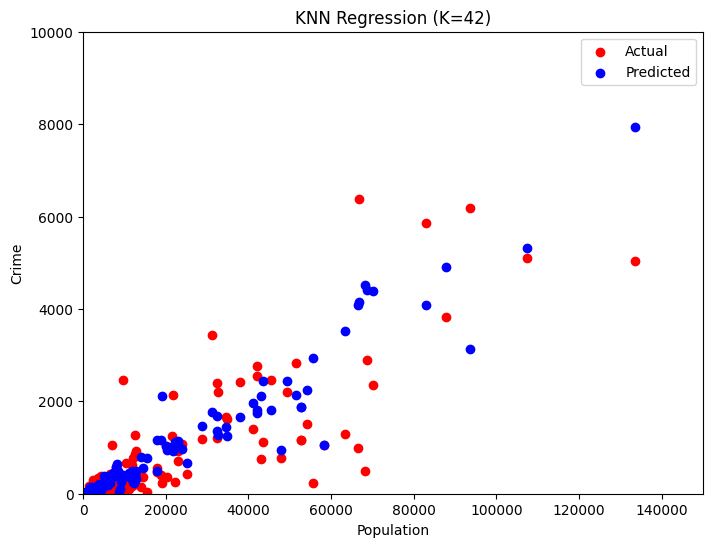

In [64]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("Crime_Rate.csv")
data = data.dropna()
x = data['Population'].values.reshape(-1, 1)
y = data['Crimes']
# scaler = MinMaxScaler()
# x2 = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k_values = list(range(1, 50))
r2_scores_train = []
r2_scores_test = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    r2_scores_train.append(r2_train)
    r2_scores_test.append(r2_test)

# Find the best k value
best_k = k_values[r2_scores_test.index(max(r2_scores_test))]
best_r2_test = max(r2_scores_test)
print(f"The best k value is {best_k} with an R2 test score of {best_r2_test}")

model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='red', label='Actual')
plt.scatter(x_test, y_test_pred, color='blue', label='Predicted')
plt.ylim(0, 10000)
plt.xlim(0, 150000)
plt.title(f'KNN Regression (K=42)')
plt.xlabel('Population')
plt.ylabel('Crime')
plt.legend()
plt.show()


KNN is better for classification

# Gradient Boosting Regressor

In [65]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv("Crime_Rate.csv")
data = data.dropna()

# Select features and target variable
X = data[['Population']]
y = data['Crimes']

# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [40, 42, 45, 46, 47, 48],
    'learning_rate': [0.114, 0.113, 0.112, 0.111, 0.110, 0.109, 0.108, 0.107]
}

# Initialize Gradient Boosting Regressor
base_model = GradientBoostingRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predictions on training and testing sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)

Best Parameters from Grid Search: {'learning_rate': 0.11, 'n_estimators': 46}
Mean Squared Error (Train): 2702441.709444245
Mean Squared Error (Test): 2755166.1554829855
R2 Score (Train): 0.9730839003746479
R2 Score (Test): 0.7339167062103393


Gradient Boosting Regressor performed alright. We used grid search and manual adjustment to find the best hyperparameters.

# Artificial Neural Networks

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = pd.read_csv("Crime_Rate.csv")
data = data.dropna()
x = data['Population'].values.reshape(-1, 1)
y = data['Crimes'].values.reshape(-1, 1)
scaler = MinMaxScaler()

model = Sequential()
model.add(Dense(units=128, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(units=64, activation='relu'))  
model.add(Dense(units=32, activation='relu')) 
model.add(Dense(units=1, activation=None)) 
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5000, verbose=0)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2 train:", r2_train)
print("r2 test:", r2_test)

model.fit(x_train, y_train, epochs=12000, verbose=0)

print("weights (epoch = 12000):", model.layers[0].get_weights()[0])
print("bias (epoch = 12000):", model.layers[0].get_weights()[1])

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2 train:", r2_train)
print("r2 test:", r2_test)

5/5 [==============================] - 0s 997us/step
r2 train: 0.7667152316678852
r2 test: 0.6902095682045735
